In [ ]:
from IPython.display import Image, display
import os

# Obtener la ruta actual
ruta_actual = os.getcwd()

# Imprimir la ruta actual
print("Estás en el directorio:", ruta_actual)
try:
   display(Image(filename='images/SD.jpg')) 
except Exception as e:
    print("No se encontró la imagen SD.jpg", e)


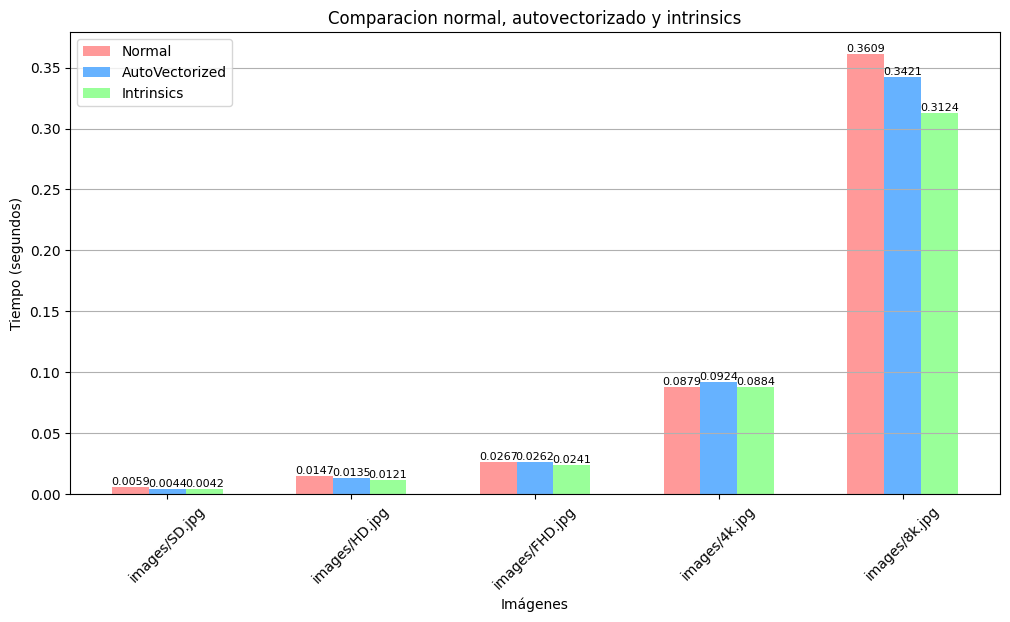

In [18]:
import subprocess
import time
import matplotlib.pyplot as plt
import os

list_images = ["images/SD.jpg", "images/HD.jpg", "images/FHD.jpg", "images/4k.jpg", "images/8k.jpg"]
list_images_grey = ["images/SD_grey.jpg", "images/HD_grey.jpg", "images/FHD_grey.jpg", "images/4k_grey.jpg", "images/8k_grey.jpg"]

def ejecutar_programa(programa, imagen):
    comando = f"./{programa} {imagen}"
    resultado = subprocess.check_output(comando, shell=True, text=True)
    lineas = resultado.split('\n')
    for linea in lineas:
        if "Tiempo:" in linea:
            tiempo = float(linea.split("Tiempo:")[1].strip())
            return tiempo

programas = ["greyScale", "greyScale_autovectorized", "greyScale_intrinsics"]

# Usar una paleta de colores pastel
colores_pastel = ['#FF9999', '#66B2FF', '#99FF99']

# Listas para almacenar los tiempos para cada programa
tiempo_normal = []
tiempo_autovectorized = []
tiempo_intrinsics = []

for imagen in list_images:
        for programa in programas:
            tiempo = 0
            for i in range(10):
                tiempo += ejecutar_programa(programa, imagen)
            tiempo /= 10
            if programa == "greyScale":
                    tiempo_normal.append(tiempo)
            elif programa == "greyScale_autovectorized":
                tiempo_autovectorized.append(tiempo)
            elif programa == "greyScale_intrinsics":
                tiempo_intrinsics.append(tiempo)

# Crear un único gráfico de barras
plt.figure(figsize=(12, 6))

# Coordenadas X para las barras
x = range(len(list_images))

# Ancho de las barras
bar_width = 0.2

# Dibuja las barras para cada programa con colores pastel
plt.bar(x, tiempo_normal, width=bar_width, label='Normal', color=colores_pastel[0])
plt.bar([i + bar_width for i in x], tiempo_autovectorized, width=bar_width, label='AutoVectorized', color=colores_pastel[1])
plt.bar([i + 2 * bar_width for i in x], tiempo_intrinsics, width=bar_width, label='Intrinsics', color=colores_pastel[2])

# Etiquetas de las barras
plt.xticks([i + bar_width for i in x], list_images, rotation=45)

# Mostrar el valor exacto del tiempo en cada barra
for i, v in enumerate(tiempo_normal):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
for i, v in enumerate(tiempo_autovectorized):
    plt.text(i + bar_width, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
for i, v in enumerate(tiempo_intrinsics):
    plt.text(i + 2 * bar_width, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

# Configuración de ejes y leyenda
plt.xlabel("Imágenes")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparacion normal, autovectorizado y intrinsics")
plt.legend()
plt.grid(True, axis='y')

plt.show()


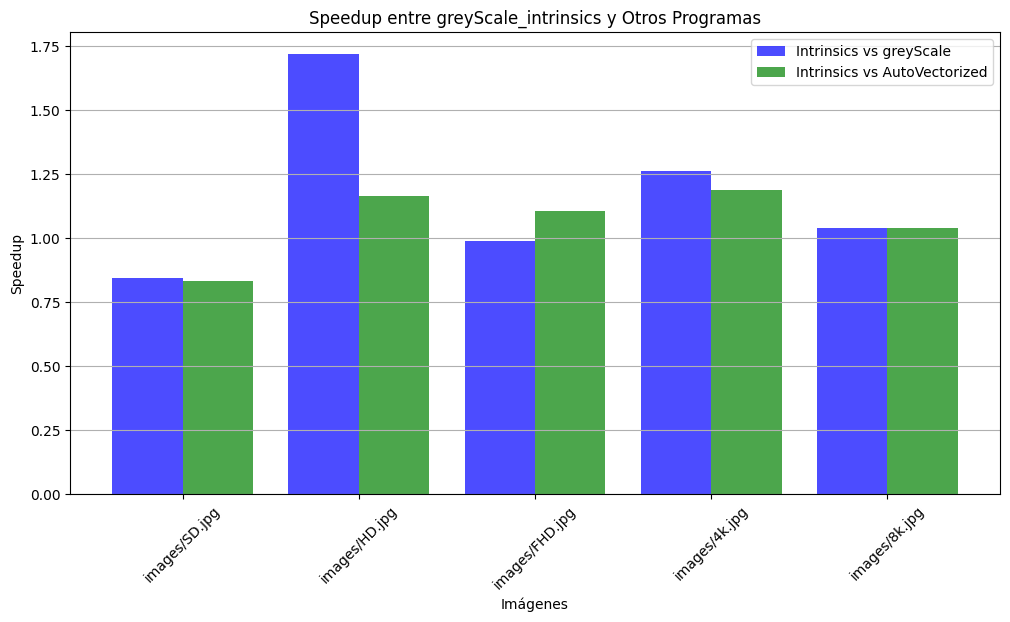

In [22]:
import subprocess
import time
import matplotlib.pyplot as plt
import os

list_images = ["images/SD.jpg", "images/HD.jpg", "images/FHD.jpg", "images/4k.jpg", "images/8k.jpg"]
list_images_grey = ["images/SD_grey.jpg", "images/HD_grey.jpg", "images/FHD_grey.jpg", "images/4k_grey.jpg", "images/8k_grey.jpg"]

def ejecutar_programa(programa, imagen):
    comando = f"./{programa} {imagen}"
    resultado = subprocess.check_output(comando, shell=True, text=True)
    lineas = resultado.split('\n')
    for linea in lineas:
        if "Tiempo:" in linea:
            tiempo = float(linea.split("Tiempo:")[1].strip())
            return tiempo

# Listas para almacenar los tiempos para cada programa
tiempo_greyScale = []
tiempo_autovectorized = []
tiempo_intrinsics = []

for imagen in list_images:
    tiempo_greyScale.append(ejecutar_programa("greyScale", imagen))
    tiempo_autovectorized.append(ejecutar_programa("greyScale_autovectorized", imagen))
    tiempo_intrinsics.append(ejecutar_programa("greyScale_intrinsics", imagen))
    # Esperar un momento para evitar problemas de medición
    time.sleep(1)

# Calcular el Speedup entre greyScale_intrinsics y greyScale
speedup_intrinsics_vs_greyScale = [tiempo_greyScale[i] / tiempo_intrinsics[i] for i in range(len(list_images))]

# Calcular el Speedup entre greyScale_intrinsics y greyScale_autovectorized
speedup_intrinsics_vs_autovectorized = [tiempo_autovectorized[i] / tiempo_intrinsics[i] for i in range(len(list_images))]

# Crear un único gráfico de barras para el Speedup
plt.figure(figsize=(12, 6))

# Coordenadas X para las barras
x = range(len(list_images))

# Ancho de las barras
bar_width = 0.4

# Dibuja las barras para el Speedup
plt.bar(x, speedup_intrinsics_vs_greyScale, width=bar_width, label='Intrinsics vs greyScale', color='b', alpha=0.7)
plt.bar([i + bar_width for i in x], speedup_intrinsics_vs_autovectorized, width=bar_width, label='Intrinsics vs AutoVectorized', color='g', alpha=0.7)

# Etiquetas de las barras
plt.xticks([i + bar_width/2 for i in x], list_images, rotation=45)

# Configuración de ejes y leyenda
plt.xlabel("Imágenes")
plt.ylabel("Speedup")
plt.title("Speedup entre greyScale_intrinsics y Otros Programas")
plt.legend()
plt.grid(True, axis='y')

plt.show()